In [1]:
%pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# CSV 파일 경로 (Notebook의 현재 작업 디렉토리 기준 data 폴더 내의 output.csv)
csv_file = "data/output.csv"

# CSV 파일을 판다스로 읽어 DataFrame으로 저장
df = pd.read_csv(csv_file, encoding='utf-8')

# DataFrame의 상위 5개 행 출력
print(df.head(5))



            Timestamp Channel  CPU          Event type  \
0  19:47:46.158397787    ros2    8            rcl_init   
1  19:47:46.159897086    ros2    8         rmw_publish   
2  19:47:46.160253455    ros2    8         rmw_publish   
3  19:47:46.160259296    ros2    8  rmw_publisher_init   
4  19:47:46.160263803    ros2    8  rcl_publisher_init   

                                            Contents  
0  { vpid = 245007, vtid = 245007, procname = "al...  
1  { vpid = 245007, vtid = 245007, procname = "al...  
2  { vpid = 245007, vtid = 245007, procname = "al...  
3  { vpid = 245007, vtid = 245007, procname = "al...  
4  { vpid = 245007, vtid = 245007, procname = "al...  


/home/pjs/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pjs/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [15]:
# 이미 df DataFrame이 로드되어 있다고 가정합니다.
# df는 다음과 같은 열을 포함해야 합니다:
# ["Timestamp", "Channel", "CPU", "Event type", "Contents"]

# Timestamp 열을 timedelta로 변환한 후 총 초 단위로 변경
df["TotalSeconds"] = pd.to_timedelta(df["Timestamp"]).dt.total_seconds()

# 전체 시간 범위 (최소 ~ 최대)
min_time = df["TotalSeconds"].min()
max_time = df["TotalSeconds"].max()
duration_sec = max_time - min_time

# CPU별 이벤트 수 계산 (CPU 열 사용)
cpu_counts = df["CPU"].value_counts().sort_index()

# 각 CPU별 1초당 평균 이벤트 수 (전체 시간 대비 이벤트 수)
avg_per_sec = cpu_counts / duration_sec

# 전체 1초당 평균 이벤트 수에서 각 CPU가 차지하는 비율(%) 계산
cpu_percent = avg_per_sec / avg_per_sec.sum() * 100

# 결과 출력
print("전체 기간(초):", duration_sec)
print("CPU별 총 이벤트 수:")
print(cpu_counts.to_dict())
print("CPU별 1초당 평균 이벤트 수:")
print(avg_per_sec.to_dict())
print("CPU별 비율(%):")
print(cpu_percent.to_dict())


전체 기간(초): 2.4290881530032493
CPU별 총 이벤트 수:
{2: 1551, 4: 2061, 6: 1682, 8: 3852, 10: 2960, 12: 4056, 14: 4058, 16: 281, 17: 33, 18: 159, 19: 100, 20: 421, 21: 104, 22: 34, 25: 3, 26: 126, 28: 532, 29: 15}
CPU별 1초당 평균 이벤트 수:
{2: 638.511203507535, 4: 848.4665315467631, 6: 692.4409054156505, 8: 1585.780242366876, 10: 1218.564256855128, 12: 1669.7623735825673, 14: 1670.585727810172, 16: 115.68126897847668, 17: 13.585344755479468, 18: 65.45666109458288, 19: 41.16771138024081, 20: 173.31606491081382, 21: 42.814419835450444, 22: 13.997021869281875, 25: 1.2350313414072243, 26: 51.87131633910342, 28: 219.0122245428811, 29: 6.1751567070361215}
CPU별 비율(%):
{2: 7.041038678046122, 4: 9.356273833303067, 6: 7.635736335572905, 8: 17.48683493735246, 10: 13.43744325404031, 12: 18.412928999455236, 14: 18.42200835300526, 16: 1.2756491737788267, 17: 0.1498093335754494, 18: 0.7218086072271651, 19: 0.4539676775013618, 20: 1.9112039222807333, 21: 0.4721263846014163, 22: 0.154349010350463, 25: 0.013619030325040

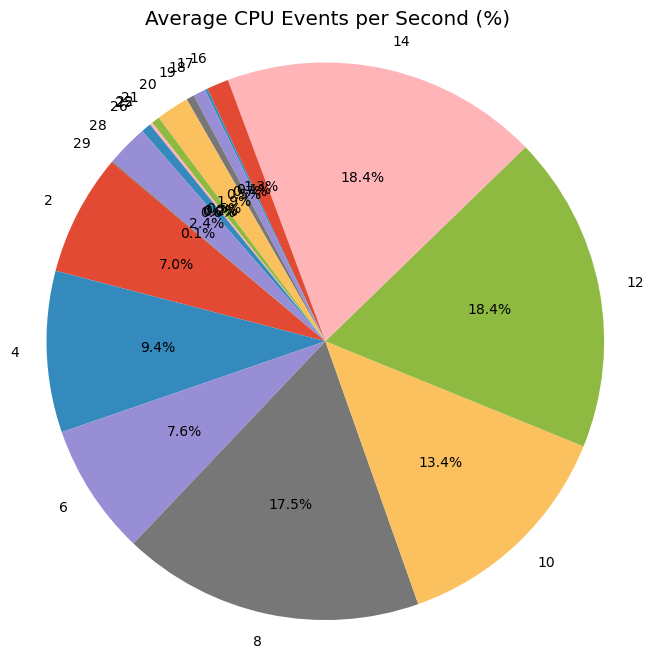

In [17]:
import matplotlib.pyplot as plt

# ggplot 스타일 적용
plt.style.use('ggplot')

# 이미 df를 통해 계산한 경우:
# cpu_counts = df["CPU"].value_counts().sort_index()
# avg_per_sec = cpu_counts / duration_sec
# cpu_percent = avg_per_sec / avg_per_sec.sum() * 100
# unique_cpus = cpu_counts.index.tolist()
# cpu_percent_values = cpu_percent.tolist()

# 만약 위 변수들이 이미 있다면:
unique_cpus = cpu_counts.index.tolist()         # 예: [ '0', '1', '2', ... ]
cpu_percent_values = cpu_percent.tolist()         # 각 CPU 비율(%) 데이터

plt.figure(figsize=(8, 8))
plt.pie(cpu_percent_values, labels=unique_cpus, autopct='%1.1f%%', startangle=140)
plt.title("Average CPU Events per Second (%)")
plt.axis('equal')  # 원형 차트 모양 유지
plt.show()


  publisher_handle  count         topic_name
0   0x645ADBF5C400   1254             /clock
1   0x645ADBF398B0   1254          /imu/data
2   0x645ADBF68D30   1254          /fsr/data
3   0x645ADBF71BA0   1254  /heroehs/odometry
4   0x645ADBF71BF0   1254      /joint_states
5   0x645ADBF50910      5  /parameter_events


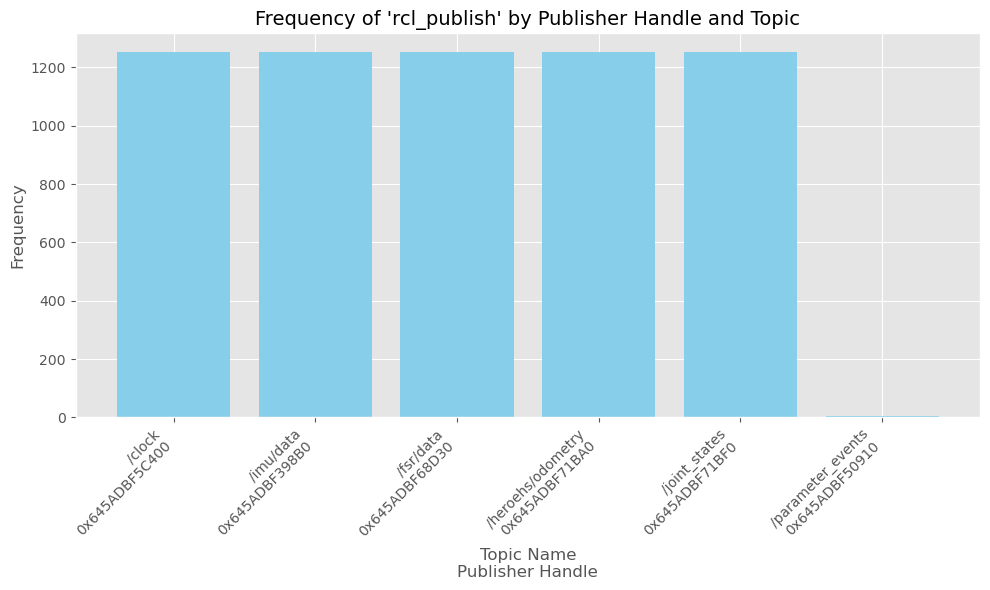

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 0) 이미 df에 CSV가 로드되어 있다고 가정
# df.columns == ["Timestamp","Channel","CPU","Event type","Contents", ... ]

# 정규표현식 패턴 (이전과 동일)
pattern_topic = r'topic_name\s*=\s*(?:"(?P<t1>[^"]+)"|(?P<t2>\S+))'
pattern_handle = r'publisher_handle\s*=\s*(\S+)'

# 1) rcl_publisher_init에서 topic_name ↔ publisher_handle 매핑 테이블 생성
df_init = df[df['Event type'].str.strip() == 'rcl_publisher_init'].copy()
ex_t = df_init['Contents'].str.extract(pattern_topic)
df_init['topic_name'] = ex_t['t1'].fillna(ex_t['t2'])
df_init['publisher_handle'] = df_init['Contents'].str.extract(pattern_handle)[0].str.rstrip(',')

mapping = df_init.drop_duplicates('publisher_handle')\
                 .set_index('publisher_handle')['topic_name']

# 2) rcl_publish 이벤트만 필터링
df_pub = df[df['Event type'].str.strip() == 'rcl_publish'].copy()
df_pub['publisher_handle'] = df_pub['Contents'].str.extract(pattern_handle)[0].str.rstrip(',')

# 3) 각 publisher_handle별 호출 횟수 집계
handle_counts = df_pub['publisher_handle'].value_counts().rename_axis('publisher_handle').reset_index(name='count')

# 4) 매핑을 통해 topic_name 붙이기
handle_counts['topic_name'] = handle_counts['publisher_handle'].map(mapping)

# 5) 결과 확인
print(handle_counts)

# 6) 시각화
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
# X축 레이블에 "topic\nhandle" 형태로
labels = handle_counts['topic_name'] + "\n" + handle_counts['publisher_handle']
plt.bar(labels, handle_counts['count'], color='skyblue')
plt.xlabel("Topic Name\nPublisher Handle", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of 'rcl_publish' by Publisher Handle and Topic", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
